In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import zscore
import numpy as np

In [ ]:
#Load data
df = pd.read_csv("/content/Dataset3.csv")

In [ ]:
df.head()

,Provinsi,Tahun,Pengeluaran_Perkapita_Sayur_Perprovinsi,Garis_Kemiskinan,Bansos
0,Aceh,2021,12130.20,475011.78,388854
1,Sumatera Utara,2021,11947.27,442529.64,789834
2,Sumatera Barat,2021,14684.21,474713.21,298621
3,Riau,2021,15759.08,542606.25,259290
4,Jambi,2021,16081.18,445559.91,171970


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Provinsi                                 114 non-null    object 
 1   Tahun                                    114 non-null    int64  
 2   Pengeluaran_Perkapita_Sayur_Perprovinsi  114 non-null    float64
 3   Garis_Kemiskinan                         114 non-null    float64
 4   Bansos                                   114 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.6+ KB


In [ ]:
df.describe()

,Tahun,Pengeluaran_Perkapita_Sayur_Perprovinsi,Garis_Kemiskinan,Bansos
count,114.000000,114.000000,114.000000,1.140000e+02
mean,2022.000000,15140.077895,500447.737018,2.156343e+06
std,0.820101,6564.706481,78015.567537,4.645718e+06
min,2021.000000,7493.270000,336800.170000,2.590700e+04
25%,2021.000000,11683.127500,451062.390000,2.897968e+05
50%,2022.000000,13801.500000,492350.815000,7.119650e+05
75%,2023.000000,16085.920000,538091.270000,1.774842e+06
max,2023.000000,45590.610000,738599.330000,2.618457e+07


In [ ]:
df.isnull().sum()

,0
Provinsi,0
Tahun,0
Pengeluaran_Perkapita_Sayur_Perprovinsi,0
Garis_Kemiskinan,0
Bansos,0


In [ ]:
df.shape

(114, 5)

In [ ]:
#pemilihan fitur
features = ['Pengeluaran_Perkapita_Sayur_Perprovinsi', 'Bansos',
            'Garis_Kemiskinan']
X = df[features]
provinsi = df['Provinsi']

In [ ]:
#Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ELBOW METHOD

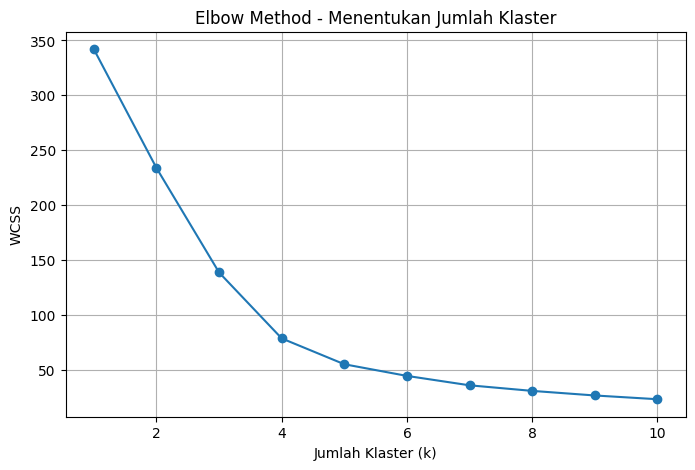

In [ ]:
#Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Menentukan Jumlah Klaster")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

SILHOUETTE SCORE

In [ ]:
#Silhouette Score untuk cari k terbaik
best_k = 0
best_score = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Train - K={k}, Silhouette Score: {score:.4f}")
    if score > best_score:
        best_score = score
        best_k = k

Train - K=2, Silhouette Score: 0.6428
Train - K=3, Silhouette Score: 0.4391
Train - K=4, Silhouette Score: 0.4439
Train - K=5, Silhouette Score: 0.4174
Train - K=6, Silhouette Score: 0.3901
Train - K=7, Silhouette Score: 0.3852
Train - K=8, Silhouette Score: 0.4020
Train - K=9, Silhouette Score: 0.3636
Train - K=10, Silhouette Score: 0.3747


In [ ]:
#Final model dengan k terbaik
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X_scaled)
final_score = silhouette_score(X_scaled, final_labels)

In [ ]:
# Simpan centroid dalam skala asli
centroids = pd.DataFrame(
    scaler.inverse_transform(final_kmeans.cluster_centers_),
    columns=features
)
centroids['Cluster'] = range(best_k)

print("\n=== Centroid Tiap Klaster (dalam skala asli) ===")
print(centroids)


=== Centroid Tiap Klaster (dalam skala asli) ===
   Pengeluaran_Perkapita_Sayur_Perprovinsi        Bansos  Garis_Kemiskinan  \
0                             15362.995741  1.110943e+06     502029.046944   
1                             11127.556667  2.097355e+07     471984.158333   

   Cluster  
0        0  
1        1  


In [ ]:
#Tampilkan hasil evaluasi
print("\n=== Evaluasi KMeans ===")
print(f"Jumlah Klaster Terbaik (k): {best_k}")
print(f"Silhouette Score (final): {final_score:.4f}")


=== Evaluasi KMeans ===
Jumlah Klaster Terbaik (k): 2
Silhouette Score (final): 0.6428


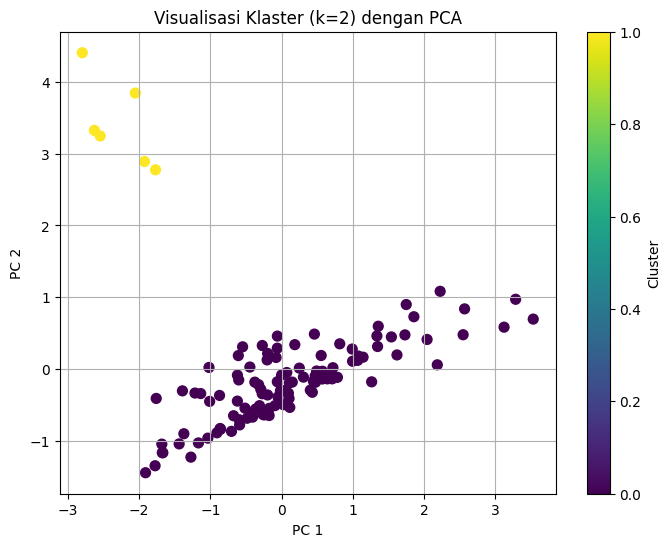

In [ ]:
# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis', s=50)
plt.title(f'Visualisasi Klaster (k={best_k}) dengan PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
#Tampilkan daftar provinsi per klaster
final_result = pd.DataFrame({
    'Provinsi': provinsi.reset_index(drop=True),
    'Cluster': final_labels
})
final_cluster_groups = final_result.groupby('Cluster')['Provinsi'].apply(list)

print("\n=== Daftar Provinsi per Klaster (Test) ===")
for cluster, prov_list in final_cluster_groups.items():
    print(f"\nKlaster {cluster} ({len(prov_list)} provinsi):")
    for prov in prov_list:
        print(f" - {prov}")


=== Daftar Provinsi per Klaster (Test) ===

Klaster 0 (108 provinsi):
 - Aceh
 - Sumatera Utara
 - Sumatera Barat
 - Riau
 - Jambi
 - Sumatera Selatan
 - Bengkulu
 - Lampung
 - Kepulauan Bangka Belitung
 - Kepulauan Riau
 - DKI Jakarta
 - Jawa Barat
 - Jawa Tengah
 - DI Yogyakarta
 - Jawa Timur
 - Banten
 - Bali
 - Nusa Tenggara Barat
 - Nusa Tenggara Timur
 - Kalimantan Barat
 - Kalimantan Tengah
 - Kalimantan Selatan
 - Kalimantan Timur
 - Kalimantan Utara
 - Sulawesi Utara
 - Sulawesi Tengah
 - Sulawesi Selatan
 - Sulawesi Tenggara
 - Gorontalo
 - Sulawesi Barat
 - Maluku
 - Maluku Utara
 - Papua Barat
 - Papua Barat Daya
 - Papua
 - Papua Selatan
 - Papua Tengah
 - Papua Pegunungan
 - Aceh
 - Sumatera Utara
 - Sumatera Barat
 - Riau
 - Jambi
 - Sumatera Selatan
 - Bengkulu
 - Lampung
 - Kepulauan Bangka Belitung
 - Kepulauan Riau
 - DKI Jakarta
 - DI Yogyakarta
 - Banten
 - Bali
 - Nusa Tenggara Barat
 - Nusa Tenggara Timur
 - Kalimantan Barat
 - Kalimantan Tengah
 - Kalimantan Se